# 数据预处理

## 加载数据

In [1]:
from lr_utils import load_dataset
train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes = load_dataset()

## 查看数据

### 查看一张图片

train_set_y_orig = 1


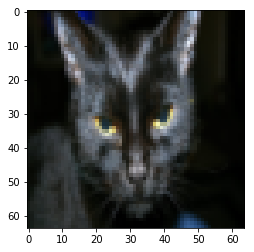

In [3]:
import matplotlib.pyplot as plt
index = 25
plt.imshow(train_set_x_orig[index])
print("train_set_y_orig = "+ str(train_set_y_orig[0][index]))

### 查看完整数据

In [4]:
m_train = train_set_y_orig.shape[1] # 训练集中图片的数量
m_test = test_set_y_orig.shape[1] # 测试集中图片的数量
num_px = train_set_x_orig.shape[1] # 图片的宽度和高度

print("训练集的数量：m_train = "+ str(m_train))
print("测试集的数量：m_test = "+str(m_test))
print("每张图片的宽/高：num_px = "+str(num_px))
print("每张图片的大小：("+str(num_px)+","+str(num_px)+",3)") # 一个像素点由GRB三原色组成

训练集的数量：m_train = 209
测试集的数量：m_test = 50
每张图片的宽/高：num_px = 64
每张图片的大小：(64,64,3)


## 数据降维

由于原始数据维数过大不好处理，因此要对数据进行降维处理，例如训练集的维度为（209，64，64，3），它表示了209张图片，宽高均为64px，每个像素点采用rgb表示。要将其处理成（64 * 64 * 3,209)的形式。

In [5]:
# 将训练集进行降维并转置
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T

# 将测试集进行降维并转置
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [6]:
print("训练集降维后的维度："+ str(train_set_x_flatten.shape))
print("训练集标签的维度："+ str(train_set_y_orig.shape))
print("测试集降维后的维度：" + str(test_set_x_flatten.shape))
print("测试集标签的维度：" + str(test_set_y_orig.shape))

训练集降维后的维度：(12288, 209)
训练集标签的维度：(1, 209)
测试集降维后的维度：(12288, 50)
测试集标签的维度：(1, 50)


## 数据归一化

In [7]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

![图片标题](https://leanote.com/api/file/getImage?fileId=5d625872ab64413276002886)

# 初始化模型

先来看一下正向传播的几个公式吧！
$$
\begin{equation}
z^{(i)} = w^T x^{(i)} + b \tag{1}
\end{equation}
$$
$$
\begin{equation}
\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}
\end{equation}
$$
$$
\begin{equation}
\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}
\end{equation}
$$

## 初始化参数

In [10]:
import numpy as np
def ini_param_with_zeros(dim):
    """
    将w初始化为维度为（dim，1）的0向量，将b初始化为set
    
    参数：
        dim - callable始化w的维度
        
    返回：
        w - 维度为（dim，1）的向量
        b - 初始化偏差0
    """
    w = np.zeros((dim,1))
    b = 0
    
    # 使用断言确保建立的是矩阵而不是数组
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return (w,b)

# print("w："+str(ini_param_with_zeros(4)[0].T))
# print("b："+str(ini_param_with_zeros(4)[1]))

w：[[0. 0. 0. 0.]]
b：0


## sigmoid函数

In [11]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# print(sigmoid(0))

0.5


# 实现前向&后向传播

初始化模型已经完成，现在就可以执行“前向”和“后向”传播步骤来学习参数了。现在要构建一个计算成本函数及其渐变的函数propagate()。

In [12]:
def propagate(w,b,X,Y):
    """
    实现前向和后向传播的成本函数及其梯度
    
    参数：
        w - 权重，维度为（64*64*3，1）的矩阵
        b - 偏差，标量
        X - 训练集，维度为（64*64*3，209）的矩阵
        Y - 标签，维度为（1，209）的矩阵
        
    返回：
        cost - 一轮迭代的代价
        dw - 权重的梯度
        db - 偏差的梯度 
    """
    
    # 训练集数量
    m = X.shape[1] 
    
    # 正向传播
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1 - A))
    
    # 反向传播
    dZ = A - Y 
    dw = (1 / m) * np.dot(X,dZ.T)
    db = (1 / m) * np.sum(dZ)
    
    # 使用断言确保数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    # 创建一个字典，把dw和db存储起来
    grads = {
        "dw": dw,
        "db": db
    }
    return (grads,cost)

# 测试propagate
print("======================测试propagate=========================")
# 初始化参数
w = np.array([[1],[2]])
b = 2
X = np.array([[1,2],[3,4]])
Y = np.array([[1,0]])
grads,cost = propagate(w,b,X,Y)
print("dw = "+str(grads["dw"]))
print("db = "+str(grads["db"]))
print("cost = "+str(cost))

======================测试propagate=========================
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


# 优化参数

现在需要多次迭代运行前向&后向传播算法来优化参数w和b。

In [13]:
def optimize(w,b,X,Y,num_iter,learning_rate,print_cost=False):
    """
    多次迭代，找到全局最优的w和b
    
    参数：
        w - 权重
        b - 偏差
        X - 训练集
        Y - 标签
        num_iter - 迭代次数
        learning_rate - 学习率
        print_cost - 每迭代100次打印一次损失值
        
    返回：
        params - 
        grads -
        
    """
    costs = []
    
    for i in range(num_iter):
        
        grads,cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # 记录代价
        if i % 100 == 0:
            costs.append(cost)
            
        # 打印成本数据
        if(print_cost) and (i % 100 == 0):
            print("迭代次数：%i，代价：%f" % (i,cost))
            
    params = {
        "w": w,
        "b": b
    }
    
    return (params,costs)
    
# 测试optimize
print("===============测试optmize==============")
w = np.array([[1],[2]])
b = 2
X = np.array([[1,2],[3,4]])
Y = np.array([[1,0]])
params,costs = optimize(w,b,X,Y,num_iter=100,learning_rate=0.009,print_cost=False)
print("w = "+str(params["w"]))
print("b = "+str(params["b"]))

===============测试optmize==============
w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891


# 预测函数

参数已经学习完毕了，现在编写预测函数来预测标签

In [14]:
def predict(w,b,X):
    """
    使用习得的模型来预测训练集的标签是0或是1
    
    参数：
        w - 权重矩阵
        b - 偏差
        X - 训练集
        
    返回：
        Y_pre - 预测值
    """
    
    m = X.shape[1] # 训练集数量
    Y_pre = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T,X)+b)
    # 概率大于0.5，预测值为1，反之为0
    for i in range(A.shape[1]):
        Y_pre[0,i] = 1 if A[0,i] > 0.5 else 0
        
    assert(Y_pre.shape == (1,m))
    
    return Y_pre

# 测试predict
print("==============测试predict===============")
w = np.array([[1],[2]])
b = 2
X = np.array([[1,2],[3,4]])
Y = np.array([[1,0]])
print("predctions = "+str(predict(w,b,X)))

==============测试predict===============
predctions = [[1. 1.]]


# 在训练集&测试集上应用模型

In [17]:
def model(X_train,Y_train,X_test,Y_test,num_iter=2000,learning_rate = 0.5,print_cost=False):
    """
    应用之前实现的预测函数在训练集和测试集上预测标签
    
    参数：
        X_train - 训练集
        Y_train - 训练集标签
        X_test - 测试集
        Y_test - 测试集标签
        num_iter - 迭代次数
        learning_rate - 学习率
        print_cost - 设置true则每迭代100次打印一次代价
        
    返回：
        d - 
    """
    
    # 1.初始化参数
    w,b = ini_param_with_zeros(X_train.shape[0])
    
    # 2.优化参数（多次前向&后向传播）
    params,costs = optimize(w,b,X_train,Y_train,num_iter,learning_rate,print_cost)
    
    # 3.习得参数
    w,b = params["w"],params["b"]
    
    # 4.预测训练集/测试集
    Y_pre_train = predict(w,b,X_train)
    Y_pre_test = predict(w,b,X_test)

    # 打印训练得准确性
    print("训练集上得准确率：",format(100 - np.mean(np.abs(Y_pre_train-Y_train)) * 100),"%")
    print("测试集上得准确率：",format(100 - np.mean(np.abs(Y_pre_test-Y_test)) * 100),"%")
    
    d = {
        "costs": costs,
        "Y_pre_test": Y_pre_test,
        "Y_pre_train": Y_pre_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iter": num_iter
    }
    
    return d
    
# 测试model
print("=================测试model===============")
d = model(train_set_x,train_set_y_orig,test_set_x,test_set_y_orig,num_iter=2100,learning_rate=0.005,print_cost=True)

=================测试model===============
迭代次数：0，代价：0.693147
迭代次数：100，代价：0.584508
迭代次数：200，代价：0.466949
迭代次数：300，代价：0.376007
迭代次数：400，代价：0.331463
迭代次数：500，代价：0.303273
迭代次数：600，代价：0.279880
迭代次数：700，代价：0.260042
迭代次数：800，代价：0.242941
迭代次数：900，代价：0.228004
迭代次数：1000，代价：0.214820
迭代次数：1100，代价：0.203078
迭代次数：1200，代价：0.192544
迭代次数：1300，代价：0.183033
迭代次数：1400，代价：0.174399
迭代次数：1500，代价：0.166521
迭代次数：1600，代价：0.159305
迭代次数：1700，代价：0.152667
迭代次数：1800，代价：0.146542
迭代次数：1900，代价：0.140872
迭代次数：2000，代价：0.135608
训练集上得准确率： 99.04306220095694 %
测试集上得准确率： 70.0 %


# 绘制学习曲线

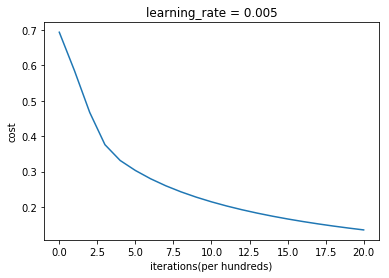

In [24]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title("learning_rate = "+str(d['learning_rate']))
plt.show()

# 使用不同的学习率

laearning rate is: 0.01
训练集上得准确率： 99.52153110047847 %
测试集上得准确率： 70.0 %

------------------------------

laearning rate is: 0.001
训练集上得准确率： 91.38755980861244 %
测试集上得准确率： 68.0 %

------------------------------

laearning rate is: 0.0001
训练集上得准确率： 71.29186602870814 %
测试集上得准确率： 40.0 %

------------------------------



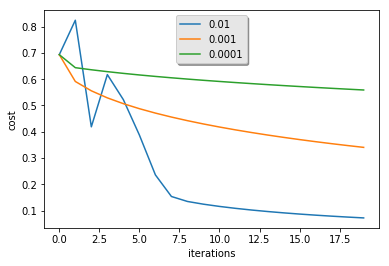

In [29]:
learning_rates = [0.01,0.001,0.0001]
models = {}
for i in learning_rates:
    print("laearning rate is: "+str(i))
    models[str(i)] = model(train_set_x,train_set_y_orig,test_set_x,test_set_y_orig,num_iter=2000,learning_rate=i,print_cost=False)
    print('\n'+"------------------------------"+'\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]),label = str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center',shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()